In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
news_df = pd.read_csv('data/training/in/news/archive/raw_partner_headlines.csv')

In [7]:
news_df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [4]:
news_df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [10]:
news_df = news_df[news_df['date'] > '2010-01-01']

/var/folders/mg/lr7m2p2119xbdqz4v6d7j8cc0000gn/T/ipykernel_80879/1564363214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['date'] = pd.to_datetime(news_df['date'])


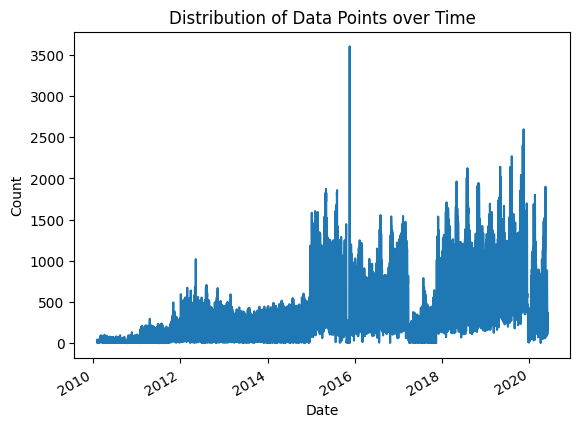

In [11]:
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['date'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Distribution of Data Points over Time')
plt.show()

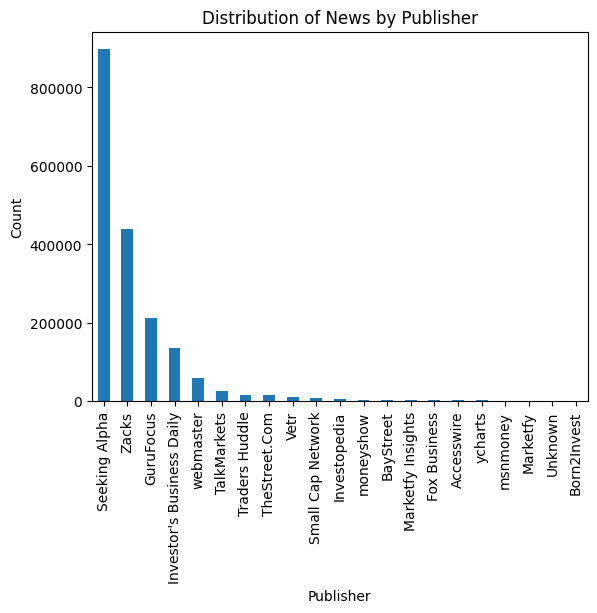

In [12]:
news_df['publisher'].value_counts().plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.title('Distribution of News by Publisher')
plt.show()

In [13]:
news_df.drop(columns=['Unnamed: 0'], inplace=True)
news_df.rename(columns={'headline': 'Headline', 'url': 'URL', 'publisher': 'Publisher', 'date': 'Date', 'stock': 'Ticker'}, inplace=True)
news_df

/var/folders/mg/lr7m2p2119xbdqz4v6d7j8cc0000gn/T/ipykernel_80879/854062516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df.drop(columns=['Unnamed: 0'], inplace=True)
/var/folders/mg/lr7m2p2119xbdqz4v6d7j8cc0000gn/T/ipykernel_80879/854062516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df.rename(columns={'headline': 'Headline', 'url': 'URL', 'publisher': 'Publisher', 'date': 'Date', 'stock': 'Ticker'}, inplace=True)


,Headline,URL,Publisher,Date,Ticker
0,Agilent Technologies Announces Pricing of $5……...,http://www.gurufocus.com/news/1153187/agilent-...,GuruFocus,2020-06-01,A
1,Agilent (A) Gears Up for Q2 Earnings: What's i...,http://www.zacks.com/stock/news/931205/agilent...,Zacks,2020-05-18,A
2,J.P. Morgan Asset Management Announces Liquida...,http://www.gurufocus.com/news/1138923/jp-morga...,GuruFocus,2020-05-15,A
3,"Pershing Square Capital Management, L.P. Buys ...",http://www.gurufocus.com/news/1138704/pershing...,GuruFocus,2020-05-15,A
4,Agilent Awards Trilogy Sciences with a Golden ...,http://www.gurufocus.com/news/1134012/agilent-...,GuruFocus,2020-05-12,A
...,...,...,...,...,...
1845554,Consumer Cyclical Sector Wrap,https://www.benzinga.com/content/12/08/2846030...,webmaster,2012-08-20,ZX
1845555,Consumer Cyclical Sector Wrap,https://www.benzinga.com/content/12/07/2767124...,webmaster,2012-07-23,ZX
1845556,Zacks #5 Rank Additions for Monday - Tale of t...,http://www.zacks.com/stock/news/73497/here-are...,Zacks,2012-04-23,ZX
1845557,4 Stock Strategies From Wall Street: Feb. 9 (U...,http://www.thestreet.com/story/11409053/1/4-st...,TheStreet.Com,2012-02-09,ZX


In [15]:
price_df = pd.read_csv('data/training/in/price/World-Stock-Prices-Dataset.csv')

In [16]:
price_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,292731.000000,292731.000000,292731.000000,292731.000000,2.927310e+05,292731.000000,292731.000000,2.0
mean,70.446286,71.245174,69.627808,70.455215,2.322016e+07,0.003568,0.000926,0.0
std,135.931276,137.388289,134.380320,135.909365,8.762947e+07,0.069639,0.118814,0.0
min,0.196890,0.199922,0.192798,0.198861,0.000000e+00,0.000000,0.000000,0.0
25%,15.421985,15.638967,15.207284,15.424648,1.358700e+06,0.000000,0.000000,0.0
50%,33.691266,34.063354,33.293835,33.694252,4.603700e+06,0.000000,0.000000,0.0
75%,76.961395,77.743997,76.205922,76.989998,1.224450e+07,0.000000,0.000000,0.0
max,3445.580078,3463.070068,3370.000000,3427.610107,7.421641e+09,15.000000,50.000000,0.0


In [20]:
price_df = price_df[price_df['Date'] > '2010-01-01']

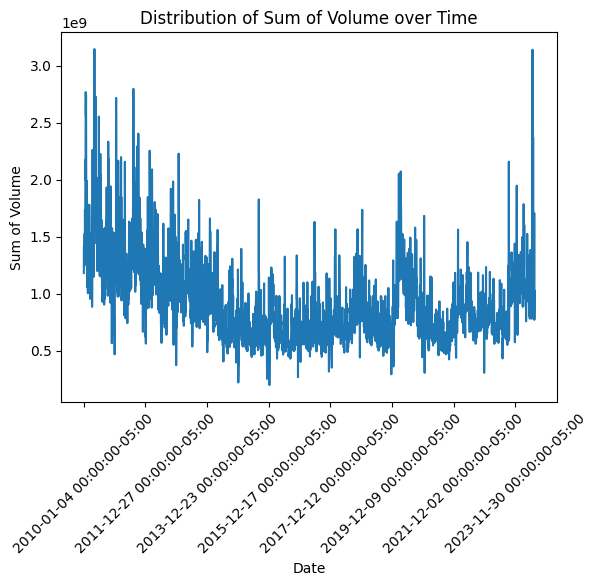

In [24]:
volume_sum = price_df.groupby('Date')['Volume'].sum()
volume_sum.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Sum of Volume')
plt.title('Distribution of Sum of Volume over Time')
plt.xticks(rotation=45)
plt.show()

In [26]:
joined_df = pd.read_csv('data/training/in/input/price_news_return.csv')

In [27]:
joined_df

,Date,Ticker,Open,High,Low,Close,Volume,Latest_News,Concatenated_News,1_day_return,2_day_return,3_day_return,4_day_return,7_day_return,10_day_return,30_day_return
0,2020-06-04,DIS,121.949997,124.500000,121.849998,123.690002,14195100.0,How The Government Can Help Build Economic Moats,How The Government Can Help Build Economic Moats,0.009053,0.028206,0.001614,-0.012359,-0.056457,-0.044944,-0.042478
1,2020-06-04,PG,108.931142,109.697355,106.687899,107.131012,6895800.0,P&G to Webcast Presentation From the Deutsche ...,P&G to Webcast Presentation From the Deutsche ...,0.019268,0.025199,0.019351,0.026671,0.005485,0.027079,0.076256
2,2020-06-04,HD,231.265405,233.487592,229.135801,230.506149,4759400.0,"The Morgan Wallen ""Chasin' You"" Stock Market (...","The Morgan Wallen ""Chasin' You"" Stock Market (...",0.023342,0.030455,0.030417,0.021615,-0.031447,0.001043,0.043897
3,2020-06-04,V,191.627505,192.096856,188.831022,189.339478,7829800.0,Visa Inc (V) VICE CHAIR & CFO Vasant M Prabhu ...,Visa Inc (V) VICE CHAIR & CFO Vasant M Prabhu ...,0.029908,0.029860,0.027326,0.034118,-0.009804,0.001392,0.007432
4,2020-06-03,LUV,34.323872,36.163876,34.157491,35.645149,26644900.0,Southwest Airlines Announces Pricing Of Notes,Southwest Airlines Announces Pricing Of Notes,0.048341,0.046097,0.102735,0.041831,-0.015333,-0.003029,-0.064601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10962,2010-02-24,JWN,24.206723,24.473980,24.099821,24.447254,2283600.0,The End of the Mac & Cheese Trade,The End of the Mac & Cheese Trade,0.007863,0.009475,0.026603,0.029443,0.062036,0.065389,0.117037
10963,2010-02-23,JWN,23.434521,24.206137,23.368003,24.073099,6205500.0,Dave's Daily: Consumer Confidence Hit,Dave's Daily: Consumer Confidence Hit - A Reta...,0.015305,0.023048,0.024634,0.041500,0.059760,0.079458,0.144180
10964,2010-02-16,AEO,9.912996,10.030419,9.814113,10.011879,1724700.0,Abercrombie Continues to Make a Splash Overseas,Abercrombie Continues to Make a Splash Overseas,-0.000000,0.029940,0.038575,0.025270,0.049295,0.071633,0.143749
10965,2010-02-12,AEO,9.789388,9.882090,9.702866,9.845010,3029400.0,ANF Preview: Targeting International Growth,ANF Preview: Targeting International Growth,0.016667,0.016667,0.046108,0.054600,0.057396,0.092308,0.156226
